<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Primera entrega: Proyecto final

### Integrantes:
    - Jorge Esteban Caballero
    - Jesus Parada Perez
    - Edgar Javier Abril Duran
    - Rebeca Gamboa Venegas

In [268]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from sklearn.impute import SimpleImputer
from pca import pca
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

## 1. Cargar datos

In [269]:
## Cargar la base de datos
print("--------------------------------------------------------")
print(f'Base de datos:')
data = pd.read_excel('data/Base perfilación de competencias_310823.xlsx')
display(data)

## Base de preguntas y competencias
print("--------------------------------------------------------")
print(f'Base de preguntas:')
df_preguntas = pd.read_excel('data/Base codificacion preguntas.xlsx')
display(df_preguntas)

## Lista de las columnas en la base de datos
print("--------------------------------------------------------")
print(f'Lista de variables en la base de datos:')
display(data.columns)

## Registros y variables en la base de datos
print("--------------------------------------------------------")
print(f'La base de datos tiene {data.shape[0]} observaciones y {data.shape[1]} variables.\n')


--------------------------------------------------------
Base de datos:


,ID,Year,Mes,solucion,regional,departamento,ubicacioninstitucion,cargo,edades,formacion,...,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20
0,1,2022,3,LABORATORIO VIVO,Centro,CUNDINAMARCA,rural,Docente,Entre 26 y 35 años,Profesional,...,Constantemente,Constantemente,Constantemente,Constantemente,Siempre,A veces,Siempre,Constantemente,Constantemente,Nunca
1,1,2022,6,LABORATORIO VIVO,Centro,CUNDINAMARCA,rural,Docente,Entre 26 y 35 años,Profesional,...,Constantemente,Siempre,Constantemente,Constantemente,Siempre,A veces,A veces,Nunca,A veces,Nunca
2,2,2022,8,ESTUDIA,Centro,VALLE DEL CAUCA,urbana,Docente,Mayor de 55 años,Posgrado,...,Constantemente,Siempre,Siempre,A veces,Siempre,A veces,Siempre,Nunca,Siempre,Nunca
3,3,2022,3,ESTUDIA,Centro,CUNDINAMARCA,urbana,Docente,Entre 36 y 45 años,Posgrado,...,Nunca,Siempre,Siempre,A veces,A veces,Nunca,Siempre,A veces,Constantemente,Nunca
4,4,2022,4,Modelos Educativos Flexibles,Caribe,ATLÁNTICO,urbana,Docente,Entre 36 y 45 años,Posgrado,...,Nunca,Constantemente,Siempre,A veces,Siempre,A veces,Siempre,Nunca,Siempre,Nunca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5265,3875,2022,4,LABORATORIO VIVO,Centro,BOGOTÁ D.C.,urbana,Docente,Mayor de 55 años,Profesional,...,A veces,A veces,Constantemente,A veces,Constantemente,Nunca,Constantemente,Nunca,A veces,Nunca
5266,3876,2022,3,LABORATORIO VIVO,Centro,EXTRANJERO,urbana,Docente,Entre 18 y 25 años,Profesional,...,Siempre,Siempre,Siempre,Constantemente,Siempre,A veces,Siempre,Nunca,Constantemente,Nunca
5267,3877,2022,4,LABORATORIO VIVO,Centro,BOGOTÁ D.C.,urbana,Docente,Entre 18 y 25 años,Profesional,...,Constantemente,Constantemente,Constantemente,Constantemente,Siempre,A veces,Constantemente,Nunca,Constantemente,A veces
5268,3878,2022,11,ESTUDIA,Centro,CUNDINAMARCA,urbana,Docente,Entre 26 y 35 años,Posgrado,...,Nunca,Constantemente,Constantemente,Constantemente,Siempre,A veces,Siempre,A veces,Siempre,A veces


--------------------------------------------------------
Base de preguntas:


,Antiguo_Nombre,Nuevo_Nombre,Competencia,Invertida
0,Reconoce una amplia gama de técnicas para generar ideas,p1,CREATIVIDAD E INNOVACION,No
1,"Le es difícil construir, mejorar, analizar o evaluar sus propias ideas para mejorar su creatividad",p2,CREATIVIDAD E INNOVACION,Si
2,Es abierto y sensible a perspectivas nuevas y diversas; incorpora ideas y realiza retroalimentación grupal.,p3,CREATIVIDAD E INNOVACION,No
3,"Cuando falla, intenta olvidar lo sucedido y sigue adelante con lo que estaba trabajando",p4,CREATIVIDAD E INNOVACION,Si
4,Comprende los sistemas y estrategias para abordar problemas desconocidos,p5,RESOLUCION DE PROBLEMAS,No
...,...,...,...,...
15,Las personas externas difícilmente aportan a la innovación y calidad de un trabajo.,p16,TRABAJO COLABORATIVO,Si
16,"Es consciente de varios tipos de interacción verbal (conversaciones, entrevistas, debates, etc.) y las principales características de diferentes estilos y registros en lenguaje hablado.",p17,COMUNICACIÓN,No
17,"En contextos complejos, sus comunicaciones no logran los objetivos y a veces son malinterpretadas.",p18,COMUNICACIÓN,Si
18,"Cuando entrega un mensaje, hablado o escrito, cuenta con los suficientes argumentos para convencer a cualquier público",p19,COMUNICACIÓN,No


--------------------------------------------------------
Lista de variables en la base de datos:


Index(['ID', 'Year', 'Mes', 'solucion', 'regional', 'departamento',
       'ubicacioninstitucion', 'cargo', 'edades', 'formacion', 'sexoinscrito',
       'Marca temporal', 'formulario', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6',
       'p7', 'p8', 'p9', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16',
       'p17', 'p18', 'p19', 'p20'],
      dtype='object')

--------------------------------------------------------
La base de datos tiene 5270 observaciones y 33 variables.



**Descripción 1:**

La fundación Future Education (se modifica el nombre real de la entidad por confidencialidad) tiene como proposito promover practicas innovadores en la educación colombiana. Uno de los instrumentos que implementa en sus proyectos es una encuesta que busca medir las competencias que tienen maestros/docentes/agentes educativos y que son fundamentales para mejorar la calidad de la educación.

Las *Competencias del Siglo XXI* es una adaptación del capitulo latinoamericano del proyecto ATC21s por sus siglas en ingles *"Assessment and Teaching of 21 st Century Skills"* de la Fundación Omar Dengo. Este instrumento consta de 20 preguntas asociadas a 5 competencias: 

1.	Creatividad e innovación.
2.	Pensamiento crítico.
3.	Resolución de problemas.
4.	Comunicación.
5.	Trabajo colaborativo.

Se carga la base de datos que tiene 5270 observaciones y 33 variables, y la codificación de las 20 preguntas. Dentro de las 20 preguntas se encuentran 9 preguntas invertidas.

## 2.  Análisis preliminar 

In [270]:
## Revisando valores faltantes
def revision_tipos_nans(df):
    for col in df.columns:
        if df[col].hasnans:
            print(
                f"La variable {col} ({df[col].dtypes}): \
Contiene {df[col].isnull().sum()}({round(df[col].isnull().sum()*100/len(df),2)}%) valores vacíos"
            )
            
revision_tipos_nans(data)

La variable regional (object): Contiene 85(1.61%) valores vacíos
La variable departamento (object): Contiene 1(0.02%) valores vacíos
La variable ubicacioninstitucion (object): Contiene 1(0.02%) valores vacíos
La variable cargo (object): Contiene 16(0.3%) valores vacíos
La variable edades (object): Contiene 15(0.28%) valores vacíos
La variable formacion (object): Contiene 16(0.3%) valores vacíos
La variable sexoinscrito (object): Contiene 15(0.28%) valores vacíos


Se procede a eliminar los missing en la variable regional, ya que para la Future Education es importante saber a que regional pertenecen los docentes:

In [271]:
## Eliminar missing
print(
    f"La base de datos original tiene {data.shape[0]} \
observaciones y {data.shape[1]} variables."
)

data.dropna(inplace=True)
print("--------------------------------------------------------")
print(
    f"\nLa base de datos después de eliminar los missing tiene {data.shape[0]} \
observaciones y {data.shape[1]} variables."
)


La base de datos original tiene 5270 observaciones y 33 variables.
--------------------------------------------------------

La base de datos después de eliminar los missing tiene 5168 observaciones y 33 variables.


In [272]:
## Revisando valores unicos
print("--------------------------------------------------------")
print(f'Revisando valores unicos:')
lista = list(data.columns)
for i in lista:
    if len(data[i].unique()) < 50:
        print(f'La columna {i}: {sorted(data[i].unique())}')
    else:
        print(f'La columna {i}: tiene más de 50 dominios')

--------------------------------------------------------
Revisando valores unicos:
La columna ID: tiene más de 50 dominios
La columna Year: [2022, 2023]
La columna Mes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
La columna solucion: ['CENTROS DEMOSTRATIVOS', 'EDULABS', 'ESCUELAS LABORATORIO', 'ESTUDIA', 'Fortalecimiento CDIs', 'Fortalecimiento IE', 'LA GRAN TRANSICIÓN', 'LA VUELTA AL MUNDO', 'LABORATORIO VIVO', 'LABORATORIO ÁGIL', 'Modelos Educativos Flexibles', 'Nube9', 'PROYECTO ESPECIAL', 'RAS']
La columna regional: ['Antioquia', 'Caribe', 'Centro', 'Nacional', 'Suroccidente']
La columna departamento: ['AMAZONAS', 'ANTIOQUIA', 'ARAUCA', 'ATLÁNTICO', 'BOGOTÁ D.C.', 'BOLÍVAR', 'BOYACÁ', 'CALDAS', 'CAQUETÁ', 'CASANARE', 'CAUCA', 'CESAR', 'CHOCÓ', 'CUNDINAMARCA', 'CÓRDOBA', 'EXTRANJERO', 'GUAVIARE', 'HUILA', 'LA GUAJIRA', 'MAGDALENA', 'META', 'NARIÑO', 'NINGUNO', 'NORTE DE SANTANDER', 'PUTUMAYO', 'QUINDIO', 'RISARALDA', 'SANTANDER', 'SUCRE', 'TOLIMA', 'VALLE DEL CAUCA']
La columna ubicacio

Se encuentran errores en los dominios: 
- departamento: el dominio NINGUNO no es un valor valido y se debe imputar o eliminar.
- ubicacioninstitucion: la ubicación ninguna no es valida, debe ser urbana o rural
- edades: todos son docentes, maestros o agentes educativos, por lo que todos son mayores de edad; las edades 0 a 6, 7 a 14 y 15 a 17, no son validas, se debe imputar o eliminar.
- sexoinscrito: la opción Mujer no es valida, se debe reemplazar por mujer.

In [273]:
## Revisando valores unicos
print("--------------------------------------------------------")
print(f'Revisando cantidad de datos con errores en sus dominios:')
print(f'departamento: {len(data[data.departamento.isin(["NINGUNO"])])}')
print(f"ubicacioninstitucion: {len(data[data.ubicacioninstitucion.isin(['ninguna'])])}")
print(f"edades: {len(data[data.edades.isin(['Entre 0 y 6 años', 'Entre 7 y 14 años', 'Entre 15 y 17 años'])])}")
print(f"sexoinscrito: {len(data[data.sexoinscrito.isin(['Mujer'])])}")


--------------------------------------------------------
Revisando cantidad de datos con errores en sus dominios:
departamento: 5
ubicacioninstitucion: 148
edades: 460
sexoinscrito: 2


In [274]:
data['edades'].value_counts().rename_axis('Rol').reset_index(name='Frecuencia')

,Rol,Frecuencia
0,Entre 26 y 35 años,1527
1,Entre 36 y 45 años,1505
2,Entre 46 y 55 años,950
3,Mayor de 55 años,528
4,Entre 0 y 6 años,444
5,Entre 18 y 25 años,198
6,Entre 15 y 17 años,8
7,Entre 7 y 14 años,8


### 2.1 Imputación univariada

La imputación univariada consiste en utilizar únicamente la información que posee la variable que se está imputando para poder establecer valores numéricos en las observaciones que corresponde. Además, puede escogerse el método para calcular el valor con el que se reemplazarán los datos faltantes.

In [275]:
# Reemplazar los valores incorrectos con NaN
data['departamento'] = data['departamento'].replace('NINGUNO', np.nan)
data['ubicacioninstitucion'] = data['ubicacioninstitucion'].replace('ninguna', np.nan)
data['edades'] = data['edades'].replace(['Entre 0 y 6 años', 'Entre 7 y 14 años', 'Entre 15 y 17 años'], np.nan)
data['sexoinscrito'] = data['sexoinscrito'].replace('Mujer', np.nan)

In [276]:
## Imputar con la moda
estrategia="most_frequent"

imp = SimpleImputer(missing_values=np.nan, strategy=estrategia)
imp.fit(data)

SimpleImputer(strategy='most_frequent')

In [277]:
# Imputar los valores faltantes en el DataFrame
data_imputado = pd.DataFrame(imp.transform(data), columns=data.columns)
data_imputado.head()

,ID,Year,Mes,solucion,regional,departamento,ubicacioninstitucion,cargo,edades,formacion,...,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20
0,1,2022,3,LABORATORIO VIVO,Centro,CUNDINAMARCA,rural,Docente,Entre 26 y 35 años,Profesional,...,Constantemente,Constantemente,Constantemente,Constantemente,Siempre,A veces,Siempre,Constantemente,Constantemente,Nunca
1,1,2022,6,LABORATORIO VIVO,Centro,CUNDINAMARCA,rural,Docente,Entre 26 y 35 años,Profesional,...,Constantemente,Siempre,Constantemente,Constantemente,Siempre,A veces,A veces,Nunca,A veces,Nunca
2,2,2022,8,ESTUDIA,Centro,VALLE DEL CAUCA,urbana,Docente,Mayor de 55 años,Posgrado,...,Constantemente,Siempre,Siempre,A veces,Siempre,A veces,Siempre,Nunca,Siempre,Nunca
3,3,2022,3,ESTUDIA,Centro,CUNDINAMARCA,urbana,Docente,Entre 36 y 45 años,Posgrado,...,Nunca,Siempre,Siempre,A veces,A veces,Nunca,Siempre,A veces,Constantemente,Nunca
4,4,2022,4,Modelos Educativos Flexibles,Caribe,ATLÁNTICO,urbana,Docente,Entre 36 y 45 años,Posgrado,...,Nunca,Constantemente,Siempre,A veces,Siempre,A veces,Siempre,Nunca,Siempre,Nunca


In [278]:
## Revisando valores unicos
print("--------------------------------------------------------")
print(f'Revisando valores unicos:')
lista = list(data_imputado.columns)
for i in lista:
    if len(data_imputado[i].unique()) < 50:
        print(f'La columna {i}: {sorted(data_imputado[i].unique())}')
    else:
        print(f'La columna {i}: tiene más de 50 dominios')

--------------------------------------------------------
Revisando valores unicos:
La columna ID: tiene más de 50 dominios
La columna Year: [2022, 2023]
La columna Mes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
La columna solucion: ['CENTROS DEMOSTRATIVOS', 'EDULABS', 'ESCUELAS LABORATORIO', 'ESTUDIA', 'Fortalecimiento CDIs', 'Fortalecimiento IE', 'LA GRAN TRANSICIÓN', 'LA VUELTA AL MUNDO', 'LABORATORIO VIVO', 'LABORATORIO ÁGIL', 'Modelos Educativos Flexibles', 'Nube9', 'PROYECTO ESPECIAL', 'RAS']
La columna regional: ['Antioquia', 'Caribe', 'Centro', 'Nacional', 'Suroccidente']
La columna departamento: ['AMAZONAS', 'ANTIOQUIA', 'ARAUCA', 'ATLÁNTICO', 'BOGOTÁ D.C.', 'BOLÍVAR', 'BOYACÁ', 'CALDAS', 'CAQUETÁ', 'CASANARE', 'CAUCA', 'CESAR', 'CHOCÓ', 'CUNDINAMARCA', 'CÓRDOBA', 'EXTRANJERO', 'GUAVIARE', 'HUILA', 'LA GUAJIRA', 'MAGDALENA', 'META', 'NARIÑO', 'NORTE DE SANTANDER', 'PUTUMAYO', 'QUINDIO', 'RISARALDA', 'SANTANDER', 'SUCRE', 'TOLIMA', 'VALLE DEL CAUCA']
La columna ubicacioninstitucio

Se realizó la imputación de los datos por los valores mas frecuentes.

### 2.2. Visualización

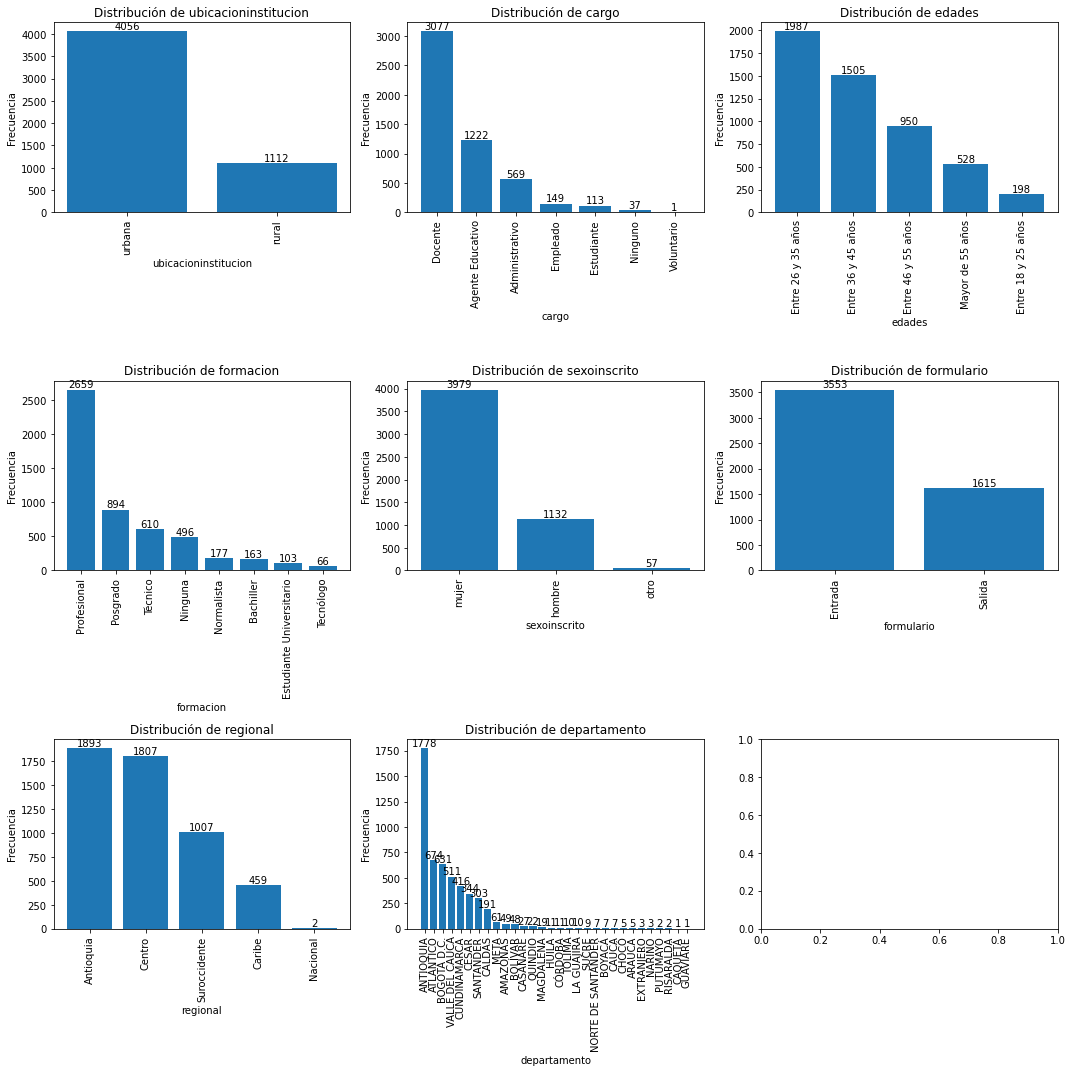

In [279]:
# Variables categóricas
categorical_variables = ['ubicacioninstitucion', 'cargo', 'edades', 'formacion', 
                         'sexoinscrito', 'formulario', 'regional', 'departamento']

# Configura un diseño de cuadrícula para mostrar múltiples gráficos
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Espaciado entre los gráficos

# Itera a través de las variables categóricas y crea gráficos de barras
for i, variable in enumerate(categorical_variables):
    row, col = i // 3, i % 3  # Calcula la fila y columna actual
    ax = axes[row, col]  # Obtén el eje actual

    # Cuenta las ocurrencias de cada categoría y crea un gráfico de barras
    counts = data_imputado[variable].value_counts()
    ax.bar(counts.index, counts.values)
    ax.set_title(f'Distribución de {variable}')
    ax.set_xlabel(variable)
    ax.set_ylabel('Frecuencia')
    ax.tick_params(axis='x', rotation=90)  # Rotar etiquetas del eje x para mejorar la legibilidad
    
    # Agrega etiquetas de datos en las barras
    for j, v in enumerate(counts.values):
        ax.text(j, v, str(v), ha='center', va='bottom')

# Ajusta automáticamente los márgenes
plt.tight_layout()
plt.show()

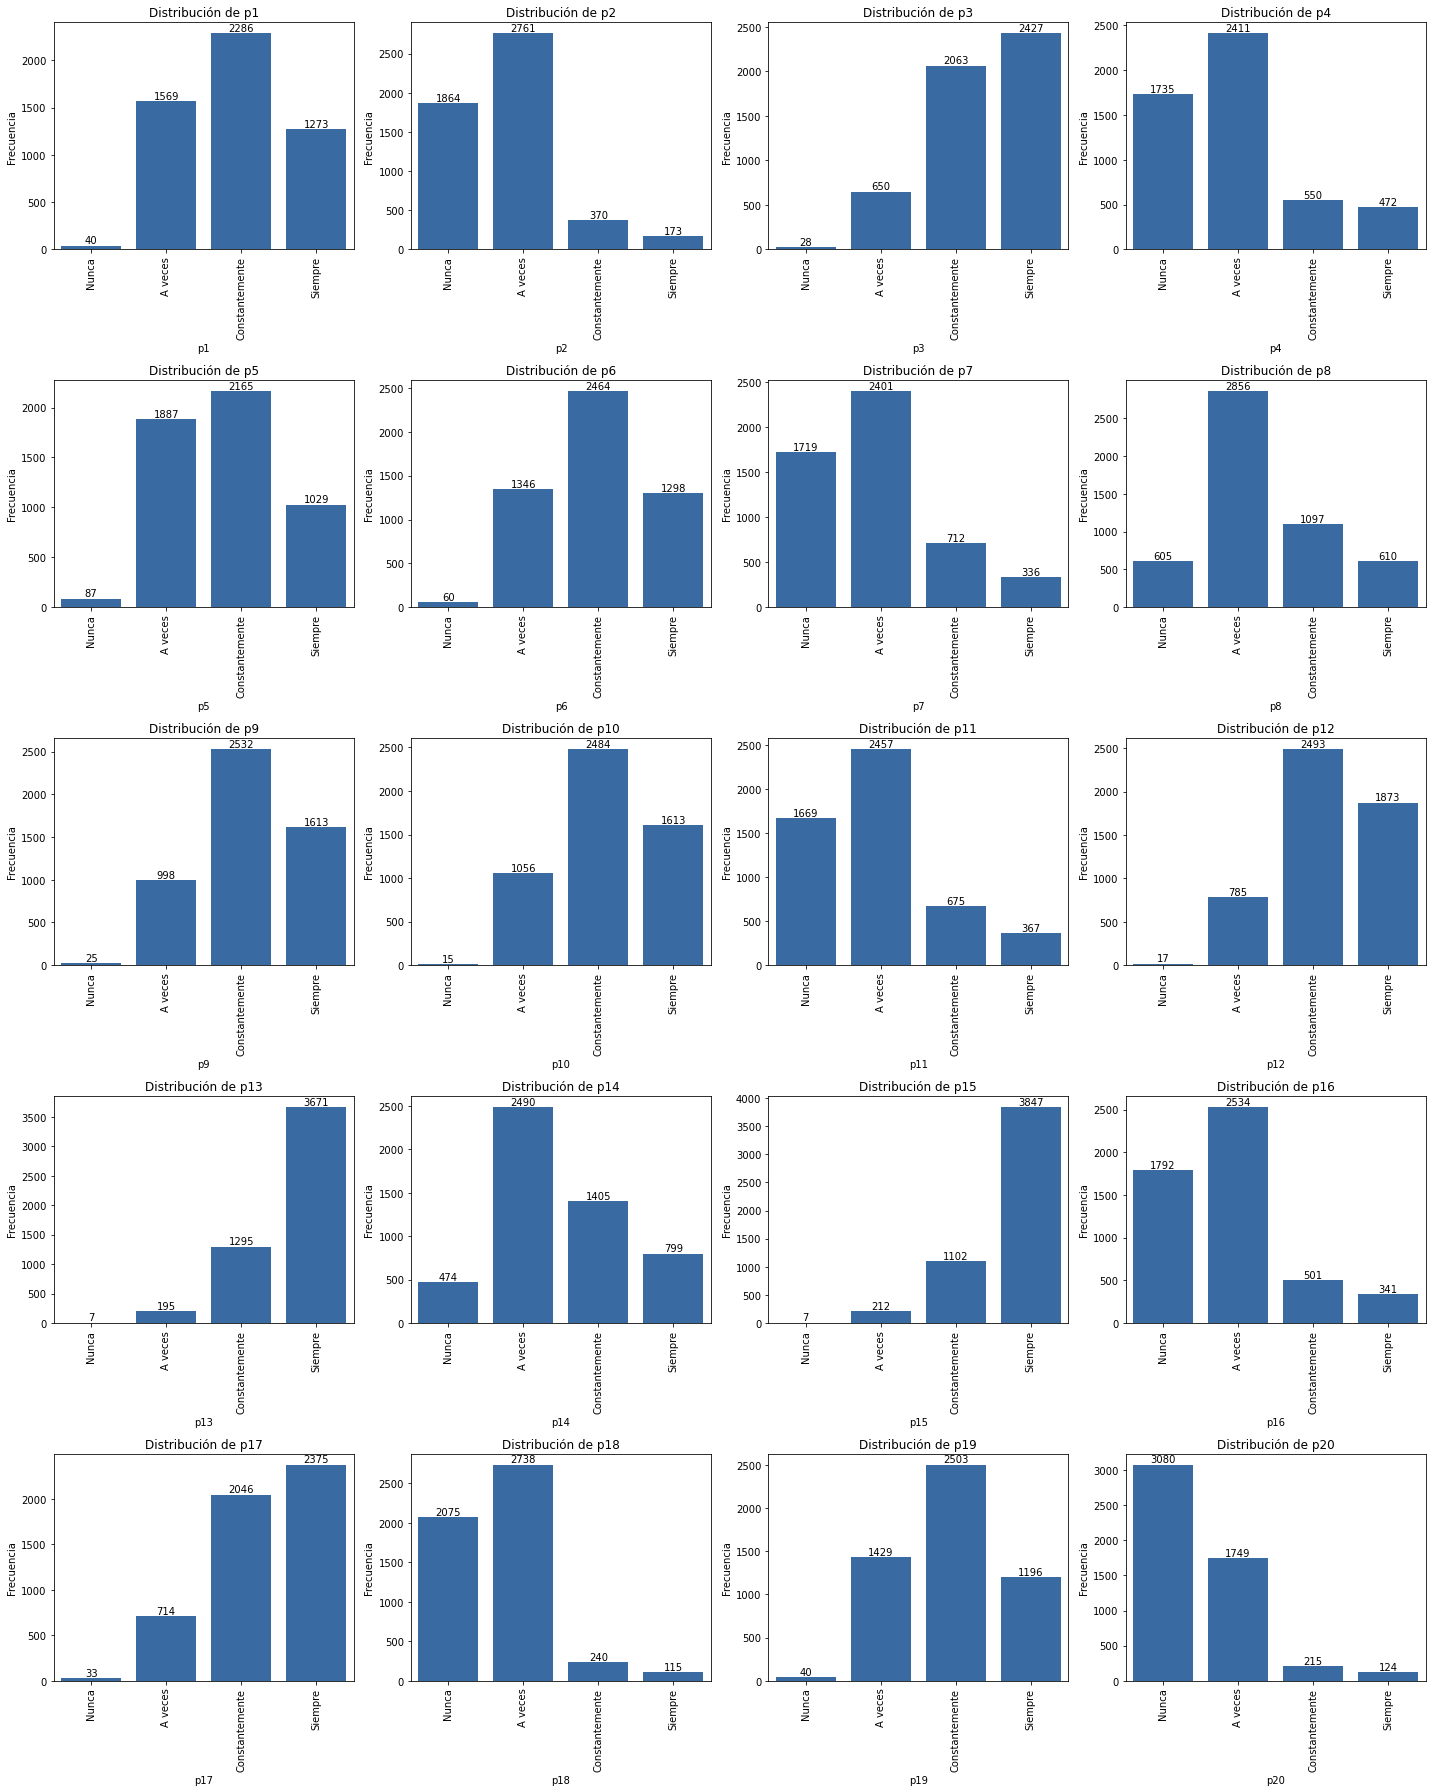

In [280]:
# Variables p1 a p20
variables_p = ['p1', 'p2', 'p3', 'p4', 
               'p5', 'p6', 'p7', 'p8', 
               'p9', 'p10', 'p11', 'p12', 
               'p13', 'p14', 'p15', 'p16', 
               'p17', 'p18', 'p19', 'p20']

# Definir el orden personalizado de las respuestas
orden = ["Nunca", "A veces", "Constantemente", "Siempre"]

# Configura un diseño de cuadrícula para mostrar múltiples gráficos
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 25))
plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Espaciado entre los gráficos

# Itera a través de las variables p y crea gráficos de barras
for i, variable in enumerate(variables_p):
    row, col = i // 4, i % 4  # Calcula la fila y columna actual
    ax = axes[row, col]  # Obtén el eje actual
    
    # Utiliza Seaborn para crear un gráfico de barras apiladas
    sns.countplot(data=data_imputado, x=variable, order=orden, color='#276ab3', ax=ax)

    ax.set_title(f'Distribución de {variable}')
    ax.set_ylabel('Frecuencia')
    ax.tick_params(axis='x', rotation=90)  # Rotar etiquetas del eje x para mejorar la legibilidad

    # Agrega etiquetas de datos en las barras
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Ajusta automáticamente los márgenes
plt.tight_layout()
plt.show()


### 2.3. Codificar las respuestas de las preguntas p1 a p20

In [281]:
# Mapear las respuestas a los valores numéricos
mapeo_respuestas = {
    "Nunca": 1,
    "A veces": 2,
    "Constantemente": 3,
    "Siempre": 4
}

# Variables p1 a p20
variables_p = ['p1', 'p2', 'p3', 'p4', #Creatividad e innovación
               'p5', 'p6', 'p7', 'p8', # Resolucion de problemas
               'p9', 'p10', 'p11', 'p12', # Pensamiento critico
               'p13', 'p14', 'p15', 'p16', # Trabajo colaborativo
               'p17', 'p18', 'p19', 'p20'] # Comunicación

# Aplicar el mapeo a las columnas correspondientes
for variable in variables_p:
    data_imputado[variable] = data_imputado[variable].replace(mapeo_respuestas)

In [282]:
data_imputado.head()

,ID,Year,Mes,solucion,regional,departamento,ubicacioninstitucion,cargo,edades,formacion,...,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20
0,1,2022,3,LABORATORIO VIVO,Centro,CUNDINAMARCA,rural,Docente,Entre 26 y 35 años,Profesional,...,3,3,3,3,4,2,4,3,3,1
1,1,2022,6,LABORATORIO VIVO,Centro,CUNDINAMARCA,rural,Docente,Entre 26 y 35 años,Profesional,...,3,4,3,3,4,2,2,1,2,1
2,2,2022,8,ESTUDIA,Centro,VALLE DEL CAUCA,urbana,Docente,Mayor de 55 años,Posgrado,...,3,4,4,2,4,2,4,1,4,1
3,3,2022,3,ESTUDIA,Centro,CUNDINAMARCA,urbana,Docente,Entre 36 y 45 años,Posgrado,...,1,4,4,2,2,1,4,2,3,1
4,4,2022,4,Modelos Educativos Flexibles,Caribe,ATLÁNTICO,urbana,Docente,Entre 36 y 45 años,Posgrado,...,1,3,4,2,4,2,4,1,4,1


Se hace la codificación y se encuentra que el instrumento tiene preguntas inversas/negativas donde la opción `Nunca` es **Siempre**, `A veces` es **Constantemente**, `Constantemente` es **A veces**, y `Siempre` es **Nunca**.

Se procede a invertir estas 9 preguntas.

In [283]:
# Variables que deben invertirse
variables_invertir = ['p2', 'p4', 'p7', 'p8', 'p11', 'p14', 'p16', 'p18', 'p20']

# Invertir las respuestas en las columnas seleccionadas
for variable in variables_invertir:
    data_imputado[variable] = 5 - data_imputado[variable]

In [284]:
data_imputado.head()

,ID,Year,Mes,solucion,regional,departamento,ubicacioninstitucion,cargo,edades,formacion,...,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20
0,1,2022,3,LABORATORIO VIVO,Centro,CUNDINAMARCA,rural,Docente,Entre 26 y 35 años,Profesional,...,2,3,3,2,4,3,4,2,3,4
1,1,2022,6,LABORATORIO VIVO,Centro,CUNDINAMARCA,rural,Docente,Entre 26 y 35 años,Profesional,...,2,4,3,2,4,3,2,4,2,4
2,2,2022,8,ESTUDIA,Centro,VALLE DEL CAUCA,urbana,Docente,Mayor de 55 años,Posgrado,...,2,4,4,3,4,3,4,4,4,4
3,3,2022,3,ESTUDIA,Centro,CUNDINAMARCA,urbana,Docente,Entre 36 y 45 años,Posgrado,...,4,4,4,3,2,4,4,3,3,4
4,4,2022,4,Modelos Educativos Flexibles,Caribe,ATLÁNTICO,urbana,Docente,Entre 36 y 45 años,Posgrado,...,4,3,4,3,4,3,4,4,4,4


### 2.4. Obtener puntajes y niveles

In [285]:
# Calcular el promedio de las respuestas para cada persona a nivel general y por competencia
data_imputado['puntaje'] = data_imputado.iloc[:, 13:33].mean(axis=1) #puntaje general
data_imputado['puntaje_creatividad'] = data_imputado.iloc[:, 13:17].mean(axis=1) # crestividad e innovación
data_imputado['puntaje_resolucion'] = data_imputado.iloc[:, 17:21].mean(axis=1) # resolucion de problemas
data_imputado['puntaje_pensamiento'] = data_imputado.iloc[:, 21:25].mean(axis=1) # pensamiento critico
data_imputado['puntaje_trabajocolab'] = data_imputado.iloc[:, 25:29].mean(axis=1) # trabajo colaborativo
data_imputado['puntaje_comunicacion'] = data_imputado.iloc[:, 29:33].mean(axis=1) # comunicacion### 2.3. Codificar las respuestas de las preguntas p1 a p20

In [286]:
data_imputado.describe().T

,count,mean,std,min,25%,50%,75%,max
p1,5168.0,2.927245,0.758749,1.00,2.00,3.00,3.00,4.0
p2,5168.0,3.222136,0.718980,1.00,3.00,3.00,4.00,4.0
p3,5168.0,3.333011,0.711525,1.00,3.00,3.00,4.00,4.0
p4,5168.0,3.046633,0.897469,1.00,3.00,3.00,4.00,4.0
p5,5168.0,2.800310,0.769297,1.00,2.00,3.00,3.00,4.0
...,...,...,...,...,...,...,...,...
puntaje_creatividad,5168.0,3.132256,0.458871,1.50,2.75,3.25,3.50,4.0
puntaje_resolucion,5168.0,2.875339,0.436587,1.00,2.50,2.75,3.25,4.0
puntaje_pensamiento,5168.0,3.116389,0.480129,1.25,2.75,3.00,3.50,4.0
puntaje_trabajocolab,5168.0,3.249758,0.414983,1.75,3.00,3.25,3.50,4.0


In [287]:
intervalos = [0, 2, 3, 4]  # Definimos los intervalos
etiquetas = ['Bajo', 'Medio', 'Alto']  # Etiquetas para los niveles

# Utilizar pd.cut para asignar niveles
data_imputado['nivel_general'] = pd.cut(data_imputado['puntaje'], bins=intervalos, labels=etiquetas)
data_imputado['nivel_creatividad'] = pd.cut(data_imputado['puntaje_creatividad'], bins=intervalos, labels=etiquetas)
data_imputado['nivel_resolucion'] = pd.cut(data_imputado['puntaje_resolucion'], bins=intervalos, labels=etiquetas)
data_imputado['nivel_pensamiento'] = pd.cut(data_imputado['puntaje_pensamiento'], bins=intervalos, labels=etiquetas)
data_imputado['nivel_trabajocolab'] = pd.cut(data_imputado['puntaje_trabajocolab'], bins=intervalos, labels=etiquetas)
data_imputado['nivel_comunicacion'] = pd.cut(data_imputado['puntaje_comunicacion'], bins=intervalos, labels=etiquetas)

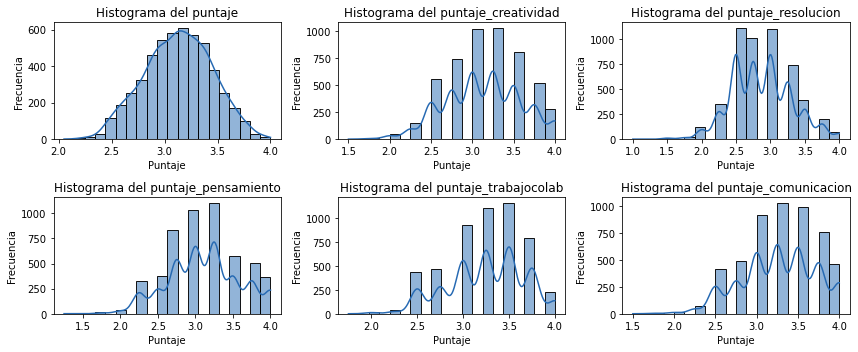

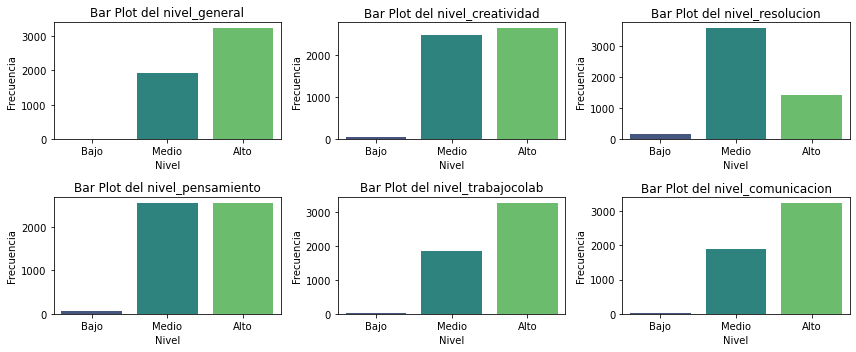

In [288]:
# Crear hist plots para cada puntaje
puntajes = ['puntaje', 'puntaje_creatividad', 'puntaje_resolucion', 'puntaje_pensamiento', 
           'puntaje_trabajocolab', 'puntaje_comunicacion']

plt.figure(figsize=(12, 5))
for i, puntajes_ in enumerate(puntajes):
    plt.subplot(2, 3, i+1)
    sns.histplot(data=data_imputado[puntajes_], bins=20, kde=True, color='#276ab3')
    plt.title(f'Histograma del {puntajes_}')
    plt.xlabel('Puntaje')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Crear bar plots para cada nivel
niveles = ['nivel_general', 'nivel_creatividad', 'nivel_resolucion', 'nivel_pensamiento', 
           'nivel_trabajocolab', 'nivel_comunicacion']

plt.figure(figsize=(12, 5))
for i, nivel in enumerate(niveles):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=data_imputado, x=nivel, order=etiquetas, palette='viridis')
    plt.title(f'Bar Plot del {nivel}')
    plt.xlabel('Nivel')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


#### 2.4.1. Consistencia interna del instrumento - alpha de Cronbach

In [289]:
## Calculando la consistencia interna
p_general = data_imputado.iloc[:, 13:33]
p_creatividad = data_imputado.iloc[:, 13:17]
p_resolucion = data_imputado.iloc[:, 17:21]
p_pensamiento = data_imputado.iloc[:, 21:25]
p_trabajocolab = data_imputado.iloc[:, 25:29]
p_comunicacion = data_imputado.iloc[:, 29:33]

# Calcular el coeficiente de confiabilidad de Cronbach
alpha_p_general = pg.cronbach_alpha(data=p_general)
alpha_p_creatividad = pg.cronbach_alpha(data=p_creatividad)
alpha_p_resolucion = pg.cronbach_alpha(data=p_resolucion)
alpha_p_pensamiento = pg.cronbach_alpha(data=p_pensamiento)
alpha_p_trabajocolab = pg.cronbach_alpha(data=p_trabajocolab)
alpha_p_comunicacion = pg.cronbach_alpha(data=p_comunicacion)

# Imprimir el valor de Cronbach's alpha
print("Cronbach's Alpha general:", alpha_p_general)
print("Cronbach's Alpha creatividad:", alpha_p_creatividad)
print("Cronbach's Alpha resolucion:", alpha_p_resolucion)
print("Cronbach's Alpha pensamiento critico:", alpha_p_pensamiento)
print("Cronbach's Alpha trabajo colaborativo:", alpha_p_trabajocolab)
print("Cronbach's Alpha comunicacion:", alpha_p_comunicacion)

Cronbach's Alpha general: (0.7657319479217338, array([0.756, 0.775]))
Cronbach's Alpha creatividad: (0.38177590517980065, array([0.354, 0.409]))
Cronbach's Alpha resolucion: (0.21097282270979162, array([0.175, 0.246]))
Cronbach's Alpha pensamiento critico: (0.5193599078446384, array([0.498, 0.54 ]))
Cronbach's Alpha trabajo colaborativo: (0.345540375632854, array([0.316, 0.374]))
Cronbach's Alpha comunicacion: (0.5190298579137433, array([0.497, 0.54 ]))


Para garantizar la confiabilidad de los resultados obtenidos en el instrumento de Perfilación de Competencias del Siglo XXI, se aplicó el coeficiente alfa de Cronbach, una prueba utilizada para evaluar la consistencia interna de las preguntas. Se obtuvo un valor general de Alpha de 0,726 lo que indica una confiabilidad buena. Los ítems de la escala están razonablemente correlacionados y la medida es considerada confiable para su uso en la mayoría de los casos.

Sin embargo, las preguntas que miden cada competencia no son consistentes, tienen una baja confiabilidad, lo que implica que no parece ser la mejor manera de agruparlas.

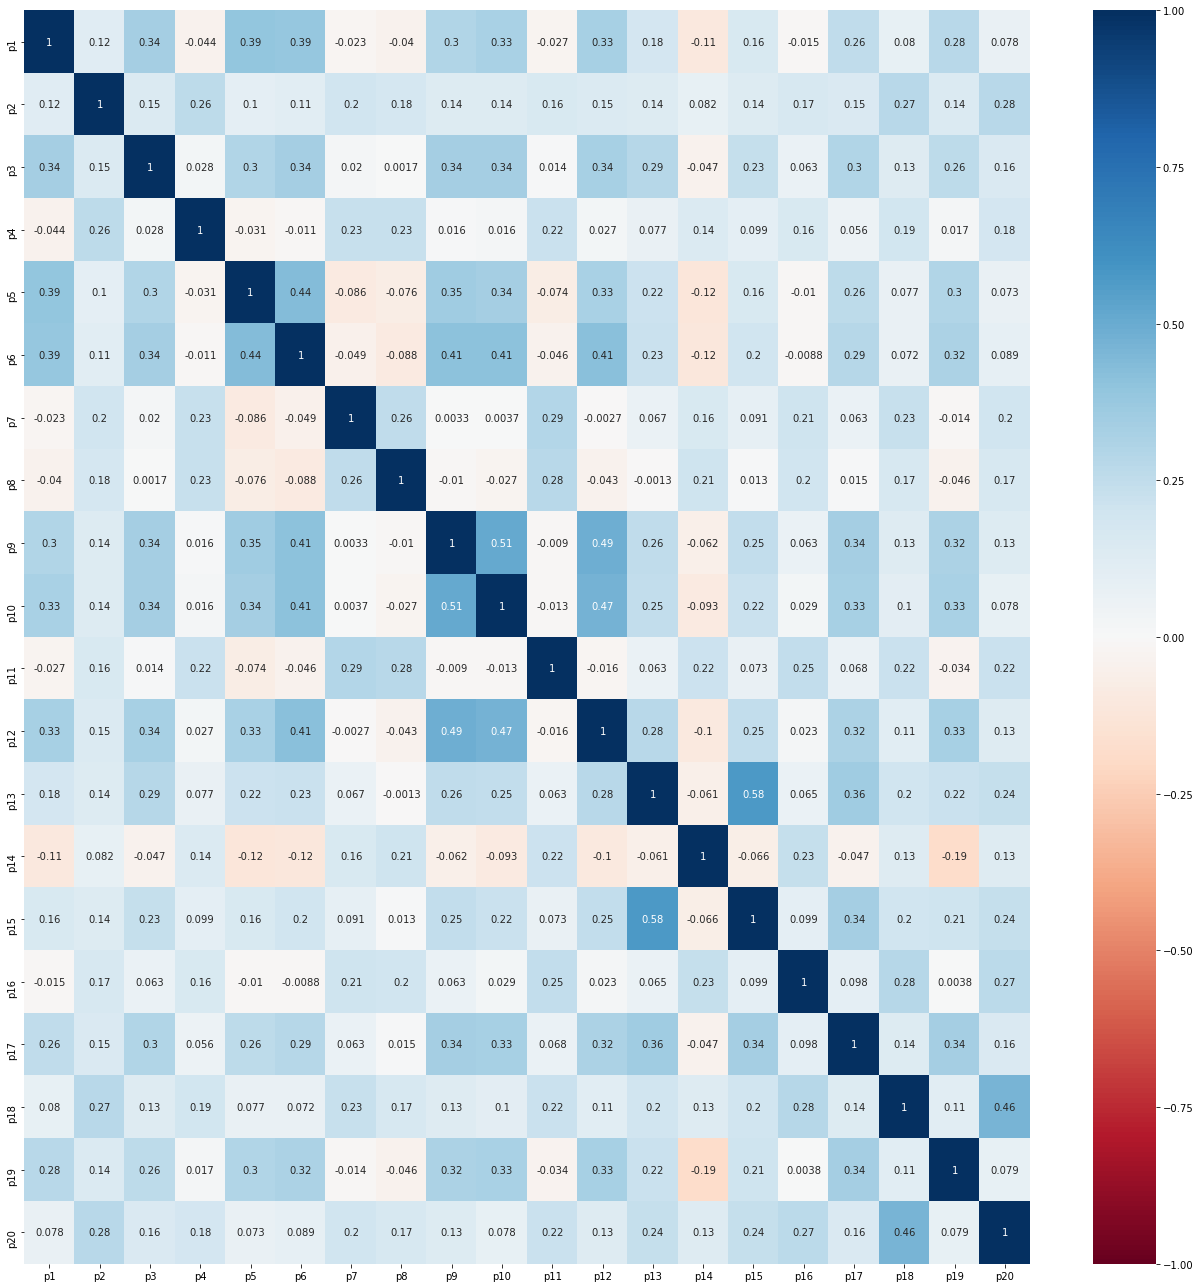

In [290]:
fig = plt.figure(figsize=(18, 18))
sns.heatmap(data_imputado.iloc[:, 13:33].corr(), cmap="RdBu", vmin=-1, vmax=1, annot=True)
plt.tight_layout()
plt.show()

No se logra identificar una correlación alta entre las variables, lo que es bueno porque queremos evitar redundancia de variables.
Incluso entre las preguntas que constituyen una competencia tampoco se encuentra alta correlación,

## 3. PCA

Se usará PCA para la reducción de dimensionalidad, decidiendo tomar los componentes que expliquen al menos el 80% de la varianza

In [291]:
from sklearn.decomposition import PCA

# Crea el objeto PCA
pca_model = PCA(n_components=20)

# Ajusta el modelo PCA a tus datos
modelo_pca = pca_model.fit_transform(data_imputado.iloc[:, 13:33])

# Explora la varianza explicada para determinar la cantidad óptima de componentes
explained_variance = pca_model.explained_variance_ratio_
cumulative_explained_variance = explained_variance.cumsum()

# Encuentra el número óptimo de componentes basado en la varianza explicada acumulativa
optimal_n_components = (cumulative_explained_variance <= 0.8).sum()+1   # Por ejemplo, puedes elegir 95% de varianza explicada


# Ajusta el modelo PCA con la cantidad óptima de componentes
pca_model = PCA(n_components=optimal_n_components)
modelo_pca = pca_model.fit_transform(data_imputado.iloc[:, 13:33])

print(f"La cantidad óptima de componentes principales es: {optimal_n_components}")

La cantidad óptima de componentes principales es: 12


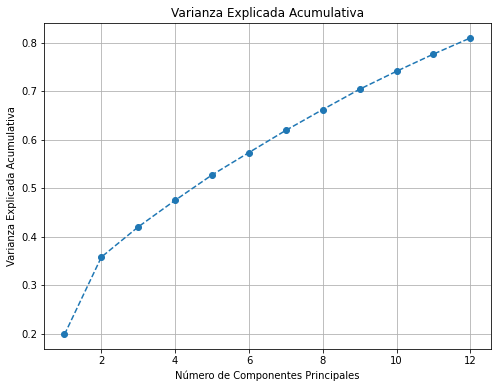

In [292]:
# Calcula la varianza explicada acumulativa
explained_variance = pca_model.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

# Gráfico de la varianza explicada acumulativa
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulativa')
plt.title('Varianza Explicada Acumulativa')
plt.grid(True)
plt.show()

In [293]:
# Imprime las proporciones de varianza explicada por cada componente principal
explained_variance_ratios = pca_model.explained_variance_ratio_
plus=0
for i, ratio in enumerate(explained_variance_ratios, 1):
    plus+=ratio
    print(f"Componente {i}: {ratio:.4f} - acumulada: {plus}")

Componente 1: 0.1985 - acumulada: 0.19847618055980742
Componente 2: 0.1596 - acumulada: 0.3581170366940728
Componente 3: 0.0623 - acumulada: 0.4204071154826365
Componente 4: 0.0548 - acumulada: 0.4752075311295068
Componente 5: 0.0523 - acumulada: 0.5275276877820546
Componente 6: 0.0462 - acumulada: 0.5737032824127407
Componente 7: 0.0457 - acumulada: 0.619417652440739
Componente 8: 0.0429 - acumulada: 0.662365870808152
Componente 9: 0.0418 - acumulada: 0.7041917430271297
Componente 10: 0.0370 - acumulada: 0.7412415445856511
Componente 11: 0.0354 - acumulada: 0.7766186218548959
Componente 12: 0.0333 - acumulada: 0.8099401668229701


In [294]:
df = pd.DataFrame(modelo_pca)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.382956,-0.014990,-1.292754,-0.206643,-0.645874,0.266603,0.505910,-0.890187,-0.403657,-1.270549,0.337839,-0.631410
1,0.568269,0.153628,-0.378308,-0.228482,-0.346173,0.635236,1.371551,1.594534,0.156919,0.989120,0.235496,0.183284
2,-1.884375,-0.510175,-0.516695,-0.490490,-0.099510,-0.765342,1.107844,-0.969102,-0.369422,-0.139257,0.135043,0.377039
3,0.033954,-2.354503,-0.329147,-0.038969,0.524843,0.180826,0.069822,-1.657644,0.387085,1.141027,-1.170892,0.215346
4,-1.374153,-1.390034,-0.424272,0.180388,0.370945,-0.566551,-0.463264,-0.528182,-0.233069,-0.082843,-0.370372,0.920284
...,...,...,...,...,...,...,...,...,...,...,...,...
5163,2.123024,-1.140694,0.656676,-0.009602,-0.683419,0.526203,0.390422,0.428465,0.227867,0.017595,-0.006490,0.246402
5164,-1.501699,1.250334,-0.178174,-0.250449,-1.130588,-0.539051,1.304622,-0.726356,-0.412048,0.357032,0.672213,-0.014261
5165,1.437344,0.872737,-0.317321,0.214065,-0.936591,-0.222885,0.365060,-0.327800,0.191993,-0.342286,0.411250,0.953357
5166,-0.830589,0.562704,-0.637436,-0.940851,0.186789,1.432557,-1.834003,-0.933599,0.102405,0.034763,-0.806100,0.218202


Se revisan las preguntas que sean más relevantes para los componentes principales de interés

In [295]:
most_important = [np.abs(pca_model.components_[i]).argmax() for i in range(12)]
initial_feature_names = [f'p{x+1}' for x in list(range(1, 21))]
most_important_names = [initial_feature_names[most_important[i]] for i in range(12)]
dic = {'PC{}'.format(i): most_important_names[i] for i in range(12)}
pc_df=pd.DataFrame(dic.items(), columns=['Componente Principal', 'Pregunta más relevante'])
pc_df

,Componente Principal,Pregunta más relevante
0,PC0,p7
1,PC1,p12
2,PC2,p5
3,PC3,p15
4,PC4,p9
...,...,...
7,PC7,p2
8,PC8,p17
9,PC9,p18
10,PC10,p20


Las preguntas que más aportan a explicar la varianza son:

In [296]:
pc_df.iloc[:,1].unique()

array(['p7', 'p12', 'p5', 'p15', 'p9', 'p2', 'p17', 'p18', 'p20', 'p6'],
      dtype=object)

In [297]:
X = pd.DataFrame(df)
X

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.382956,-0.014990,-1.292754,-0.206643,-0.645874,0.266603,0.505910,-0.890187,-0.403657,-1.270549,0.337839,-0.631410
1,0.568269,0.153628,-0.378308,-0.228482,-0.346173,0.635236,1.371551,1.594534,0.156919,0.989120,0.235496,0.183284
2,-1.884375,-0.510175,-0.516695,-0.490490,-0.099510,-0.765342,1.107844,-0.969102,-0.369422,-0.139257,0.135043,0.377039
3,0.033954,-2.354503,-0.329147,-0.038969,0.524843,0.180826,0.069822,-1.657644,0.387085,1.141027,-1.170892,0.215346
4,-1.374153,-1.390034,-0.424272,0.180388,0.370945,-0.566551,-0.463264,-0.528182,-0.233069,-0.082843,-0.370372,0.920284
...,...,...,...,...,...,...,...,...,...,...,...,...
5163,2.123024,-1.140694,0.656676,-0.009602,-0.683419,0.526203,0.390422,0.428465,0.227867,0.017595,-0.006490,0.246402
5164,-1.501699,1.250334,-0.178174,-0.250449,-1.130588,-0.539051,1.304622,-0.726356,-0.412048,0.357032,0.672213,-0.014261
5165,1.437344,0.872737,-0.317321,0.214065,-0.936591,-0.222885,0.365060,-0.327800,0.191993,-0.342286,0.411250,0.953357
5166,-0.830589,0.562704,-0.637436,-0.940851,0.186789,1.432557,-1.834003,-0.933599,0.102405,0.034763,-0.806100,0.218202


## Estimación del Score

Dado que se validó la escala para nivel general, se realizará un modelo de Random forest classifier para tener un score para realizar el clustering. Este modelo predice la probabilidad de tener puntaje alto.

Se elige un modelo de Random Forest por ser un modelo basado en árboles de rápido entrenamiento y desempeño normalmente bueno. Dado que se usa para estimar un score, no se validan hyper parámetros.

In [298]:
y = data_imputado['nivel_general']=='Alto'


In [299]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier


In [300]:
rf=RandomForestClassifier()
rf.fit(X, y)

RandomForestClassifier()

In [301]:
scores = rf.predict_proba(X)[:,1]
scores

array([0.  , 0.07, 1.  , ..., 0.  , 0.95, 1.  ])

In [302]:
import seaborn as sns



def heatmap_count(df, var1, var2):
  """Generates a Count heatmap of any two columns of a data frame

  Parameters
  ----------
  df : DataFrame
      A DataFrame that has column features
  var1 : str
      The name of a column in the DataFrame
  var2 : str
      The name of a column in the DataFrame. Different from var1
  
  Returns
  -------
  plot : seaborn.heatmap
      A heatmap of the 2 variables grouped by count, with preset configuration
  """

  heat_df=[]
  heat_df=pd.DataFrame(df.groupby([var1,var2]).count().iloc[:,1]).reset_index()
  cols=heat_df.columns
  value=[y for y in cols if y not in [var1, var2]]
  heat_df=heat_df.pivot(columns=var1, index=var2, values=value[0])
  plt.figure(figsize=(15,5))
  return sns.heatmap(heat_df, cmap="Blues",linewidths=0.5, annot=True, fmt='g')

In [303]:

from sklearn.neighbors import NearestNeighbors


### K Means

Se realiza clustering por K Means, se validan a mano diferentes K y se dejan aquellos con clusters más interpretables.

In [304]:
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans

Kmeans = KMeans(n_clusters =6, random_state = 13).fit(pd.DataFrame(scores) )
Kmeans

KMeans(n_clusters=6, random_state=13)

In [305]:
score_df = pd.DataFrame(scores, columns=['score'])

In [306]:
score_df['puntaje']= data_imputado['puntaje']

In [307]:
score_df

,score,puntaje
0,0.00,2.85
1,0.07,3.00
2,1.00,3.55
3,0.98,3.35
4,1.00,3.55
...,...,...
5163,0.03,2.85
5164,1.00,3.25
5165,0.00,2.75
5166,0.95,3.20


In [308]:
score_df['Kmeans']=Kmeans.predict(pd.DataFrame(scores))

In [309]:
data_imputado['Kmeans'] = score_df['Kmeans']

Se revisan la distribución de los clusters vs el score calculado y el puntaje:

<AxesSubplot:xlabel='score', ylabel='Count'>

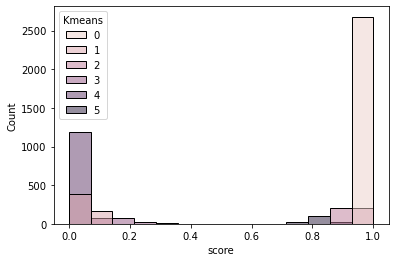

In [310]:
sns.histplot(score_df,x='score', hue='Kmeans')

<AxesSubplot:xlabel='puntaje', ylabel='Count'>

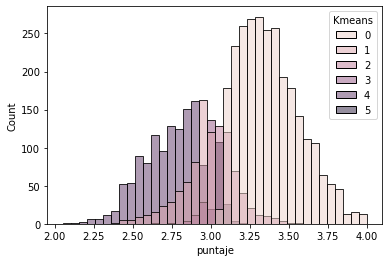

In [311]:
sns.histplot(score_df,x='puntaje', hue='Kmeans')

Se observa el scatter plot de los scores del modelo vs los puntajes reales:

<AxesSubplot:xlabel='puntaje', ylabel='score'>

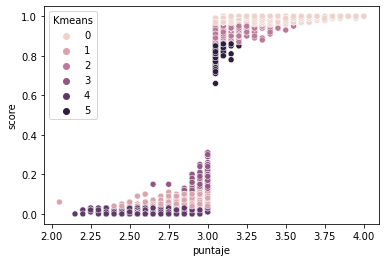

In [312]:
import matplotlib.pyplot as plt
#plt.scatter(score_df['puntaje'], score_df['score'], c=score_df['Kmeans'])



sns.scatterplot(
            y = score_df['score'], 
            x = score_df['puntaje'],
  hue=score_df['Kmeans'],
            )


Se calcula una métrica de consistencia interna para el cluster elegido (la consistencia externa viene de la prueba de valores )

In [313]:
silhouette_score(pd.DataFrame(scores), score_df['Kmeans'], random_state=1345)


0.7186099400090367

Se presentan los resultados discriminados por clusters:

In [314]:
data_imputado[['Kmeans', 'nivel_general', 'p1']].groupby(['Kmeans', 'nivel_general']).count()

p1
Kmeans nivel_general      
0      Bajo              0
       Medio             0
       Alto           2679
1      Bajo              0
       Medio           561
       Alto              0
2      Bajo              0
       Medio             0
       Alto            415
3      Bajo              0
       Medio           181
       Alto              0
4      Bajo              0
       Medio          1193
       Alto              0
5      Bajo              0
       Medio             0
       Alto            139

In [315]:
preguntas=[f'p{x}' for x in list(range(1,21))]

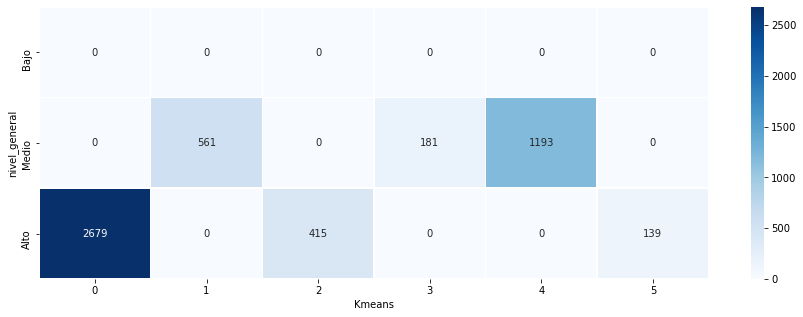

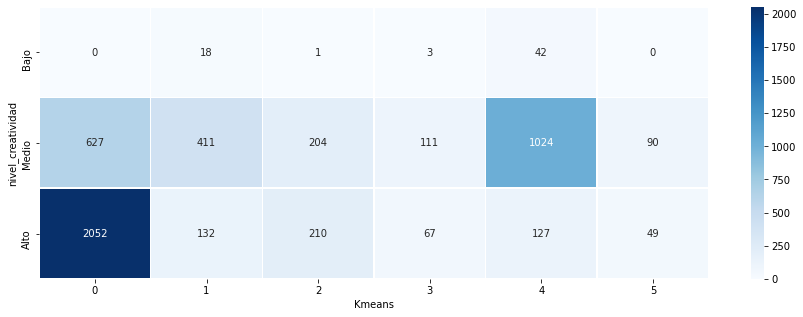

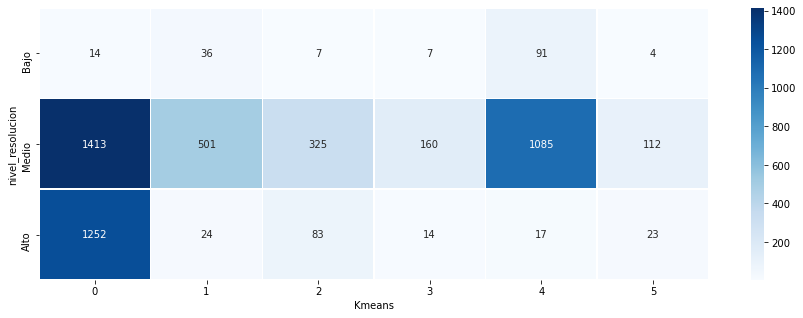

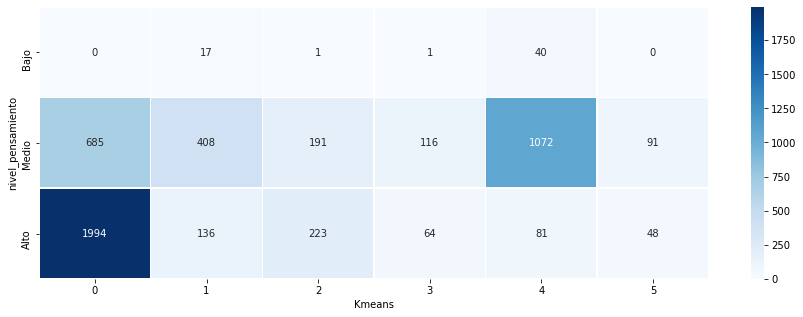

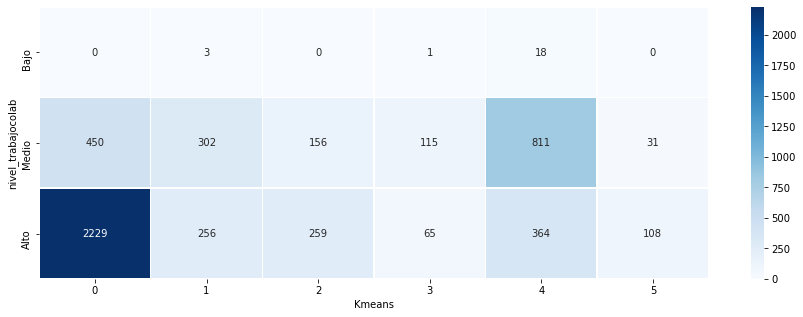

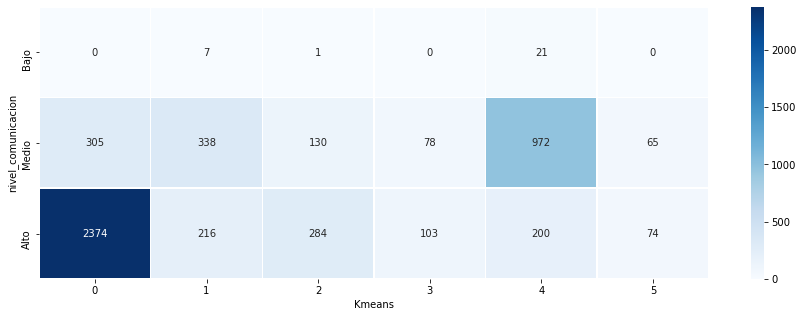

In [316]:
for var in niveles:
    heatmap_count(data_imputado, "Kmeans", var)

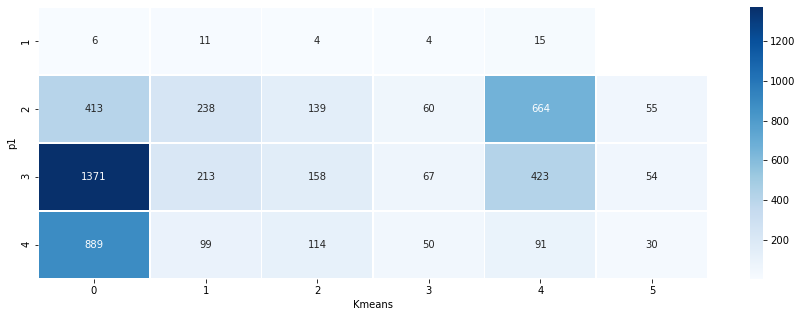

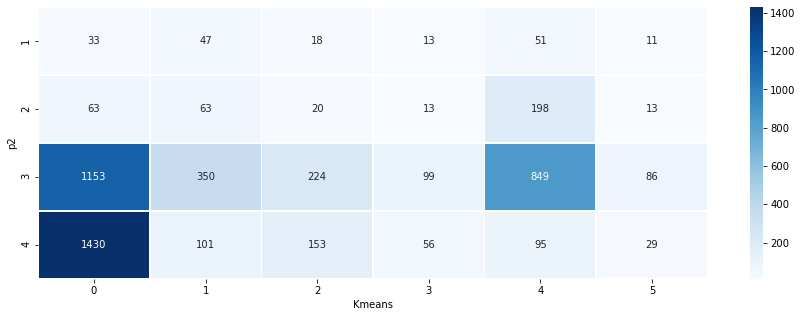

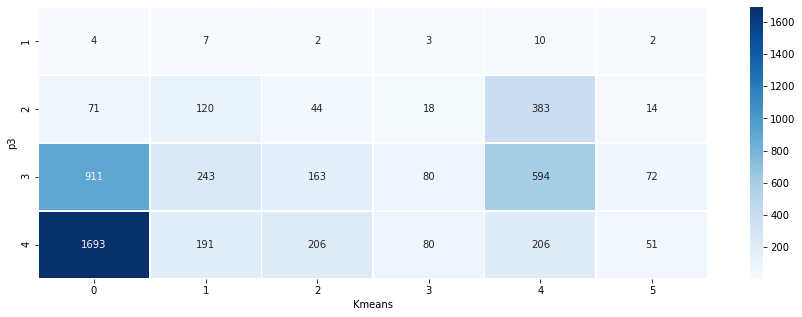

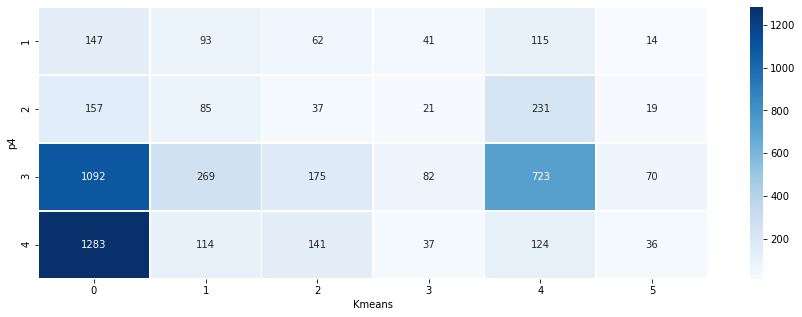

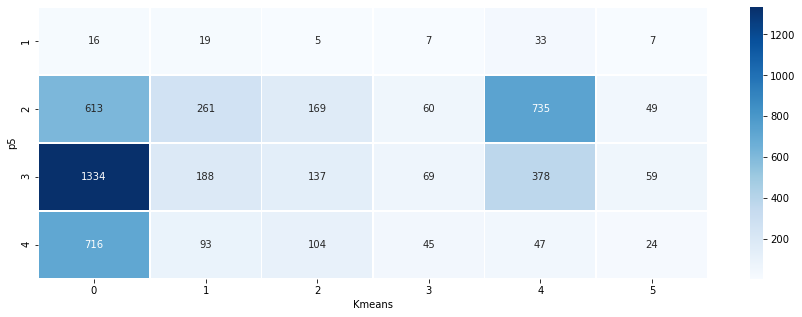

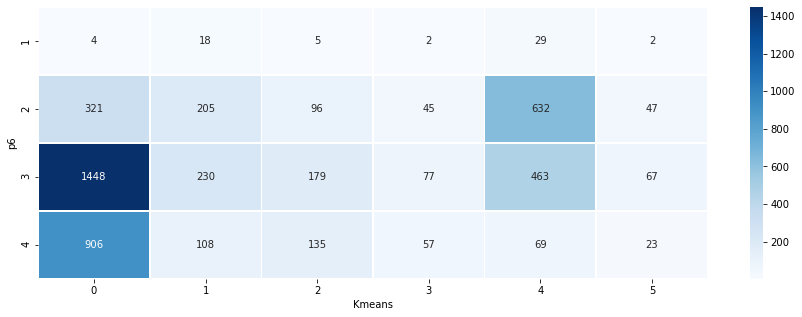

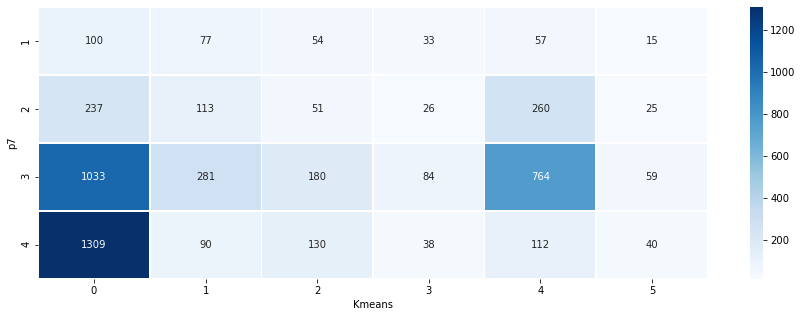

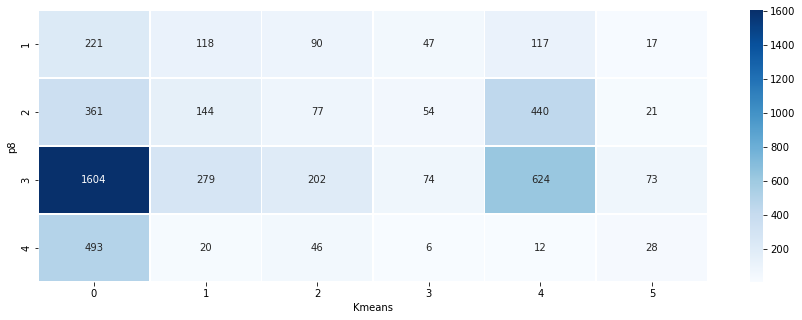

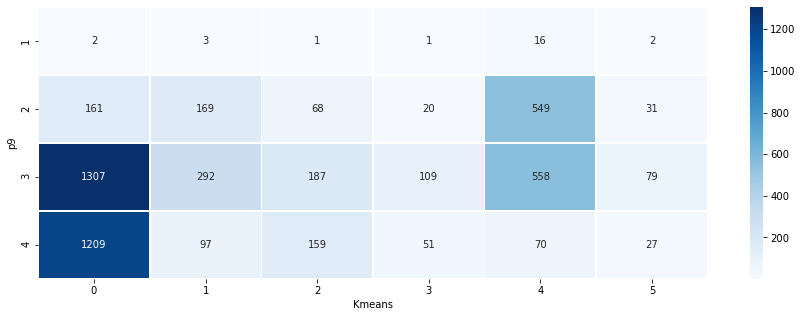

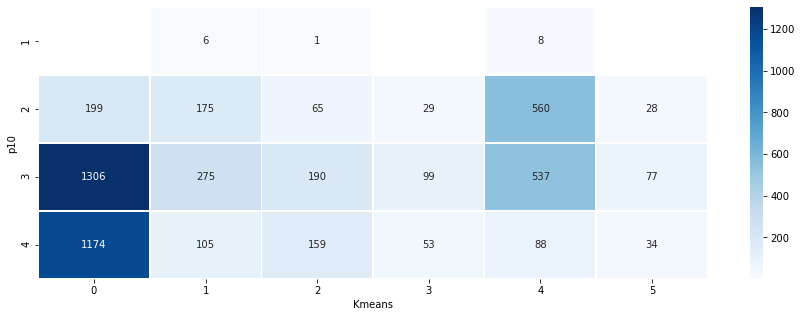

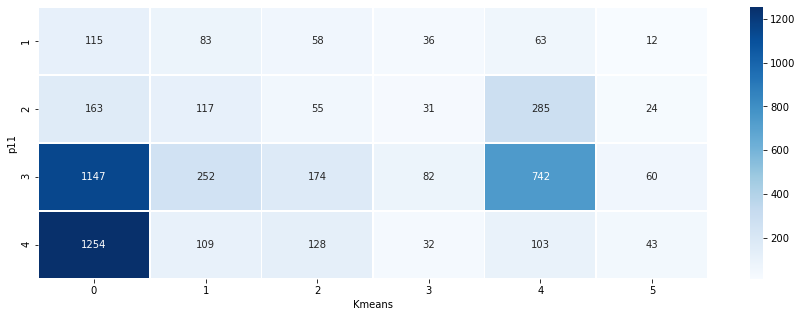

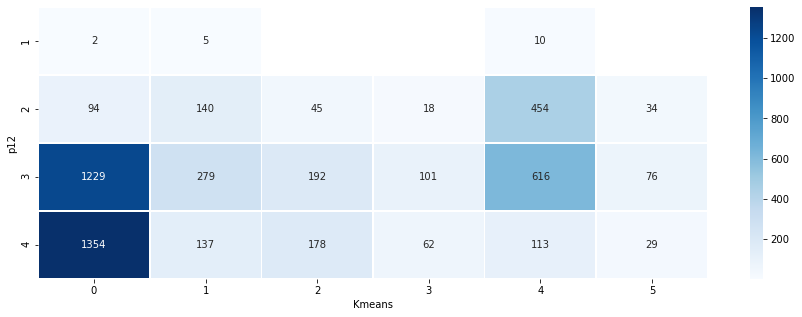

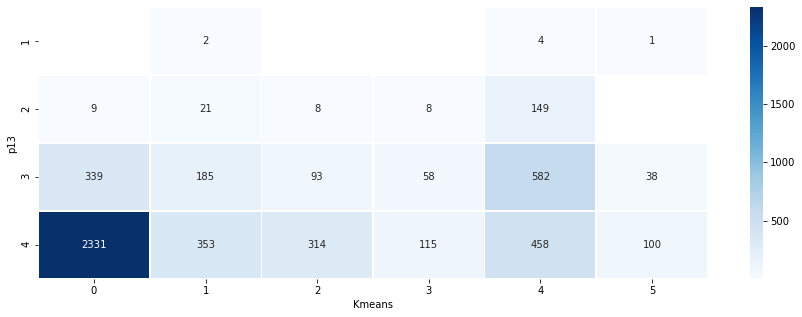

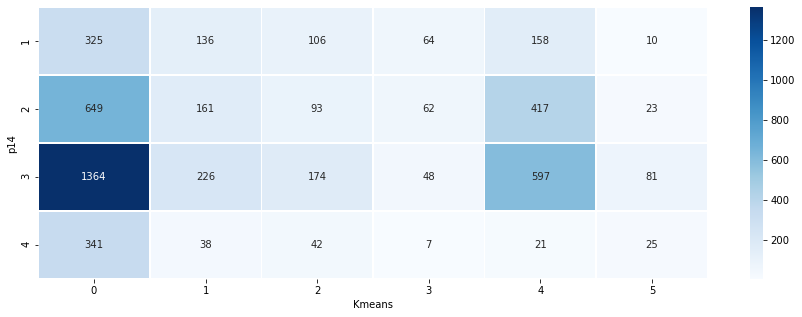

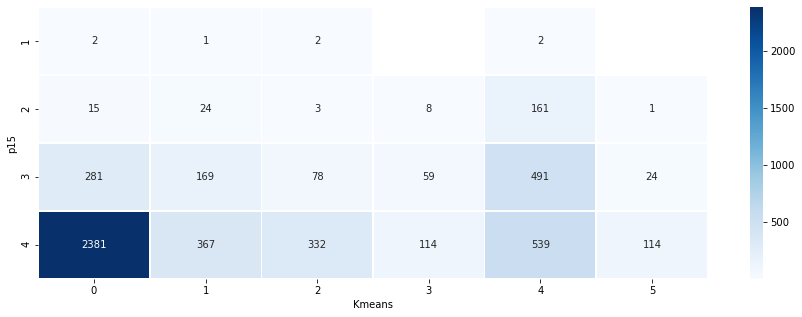

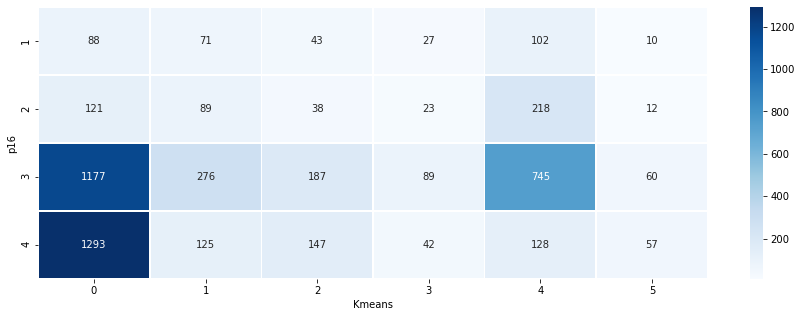

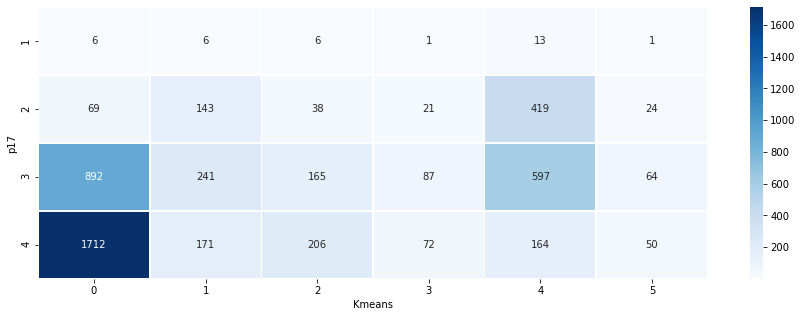

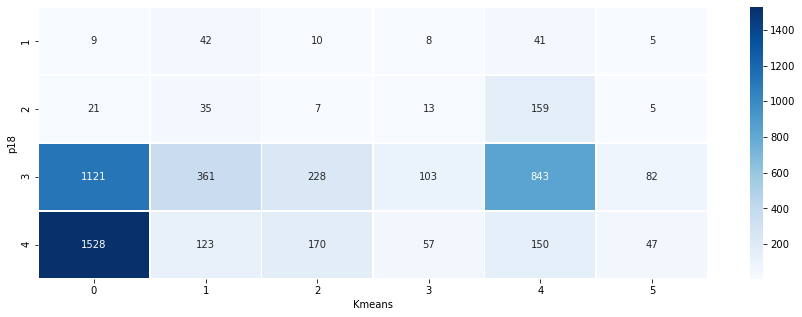

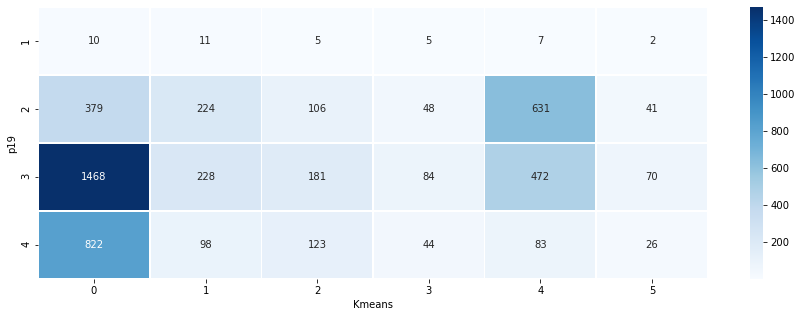

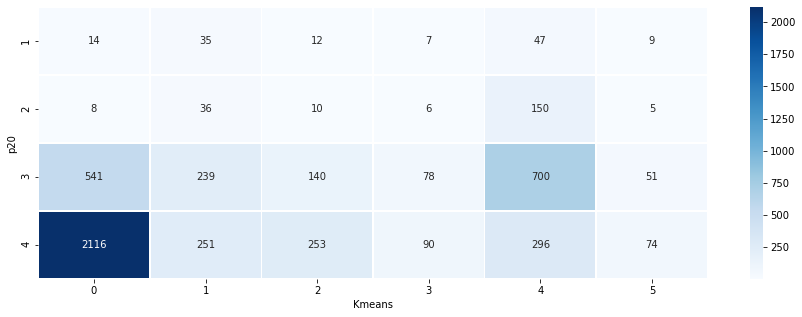

In [317]:
for var in preguntas:
    heatmap_count(data_imputado, "Kmeans", var)


## DBSCAN

Se procede a aplicar DBSCAN a los scores encontrados. 

Primero, se busca el epsilon con el codo:

0.010000000000000009


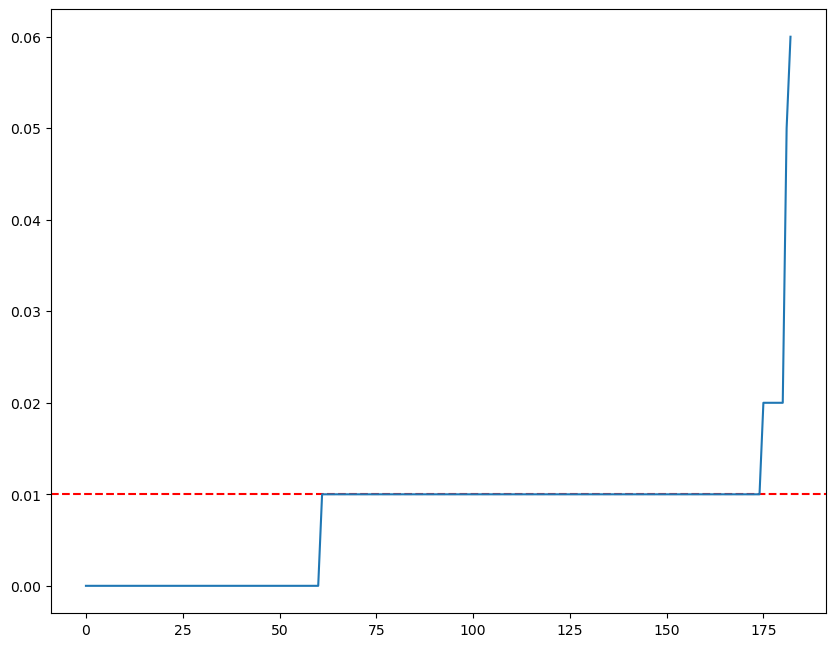

In [318]:
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator



neigh = NearestNeighbors(n_neighbors = 3)
nbrs = neigh.fit(pd.DataFrame(scores).drop_duplicates())
distancias, indices = nbrs.kneighbors(pd.DataFrame(scores).drop_duplicates())
distancias
distancias = np.sort(distancias.flatten())
i = np.arange(len(distancias))
knee = KneeLocator(i, distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')

print(distancias[knee.knee])
fig=plt.figure(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')
plt.axhline(y = distancias[knee.knee], color = 'r', linestyle = '--')
plt.plot(distancias)

Luego, usando el epsilon se calcula un min samples que diferencie suficiente a los clusters

In [319]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.01, min_samples=30)
clusters=db.fit_predict(pd.DataFrame(scores))
score_df['dbscan'] = clusters
set(clusters)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}

<AxesSubplot:xlabel='puntaje', ylabel='score'>

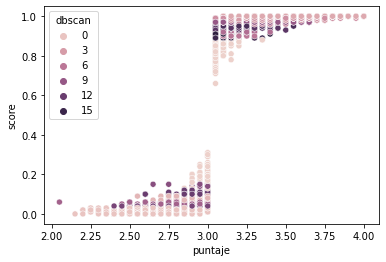

In [320]:

sns.scatterplot(
            y = score_df['score'], 
            x = score_df['puntaje'],
  hue=score_df['dbscan'],
            )

se calcula score de silhouette

In [321]:
silhouette_score(pd.DataFrame(scores), score_df['dbscan'], random_state=1345)

0.726483404313128

y se revisa lo mismo que en K means para estos clusters:

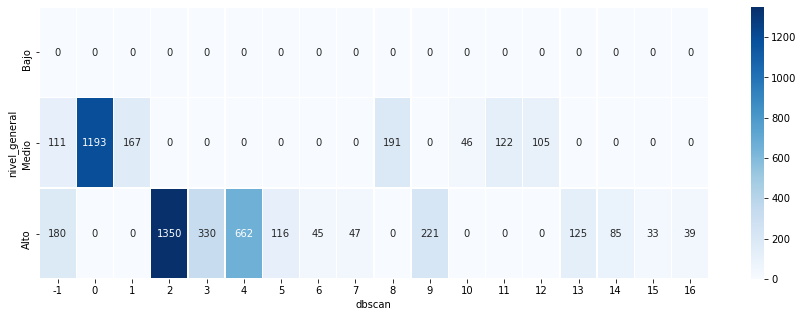

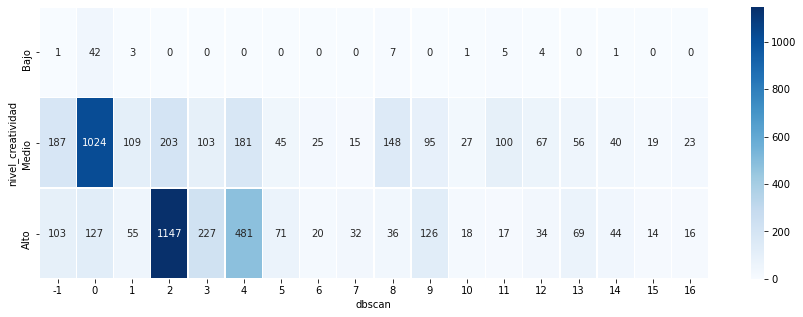

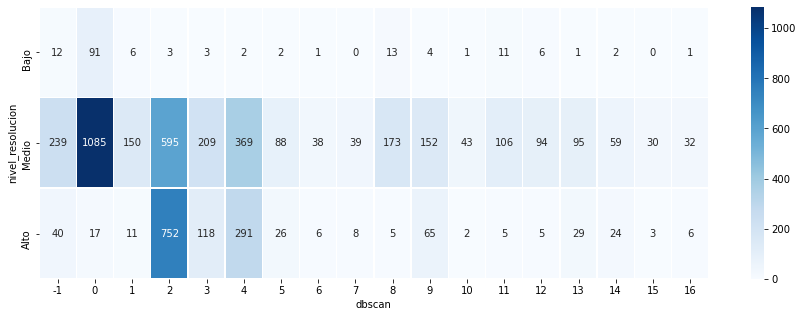

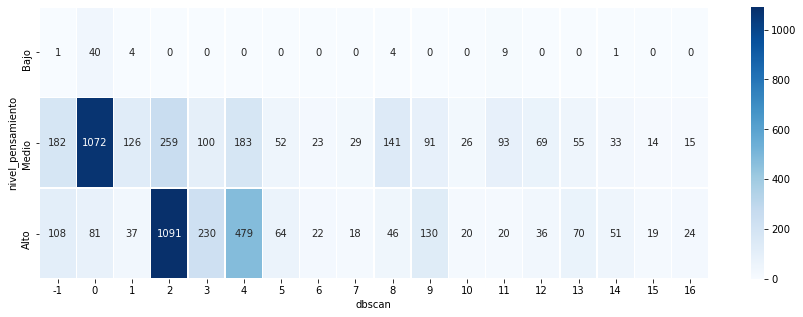

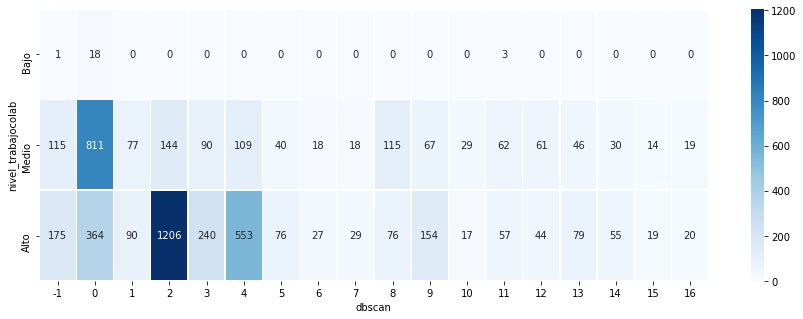

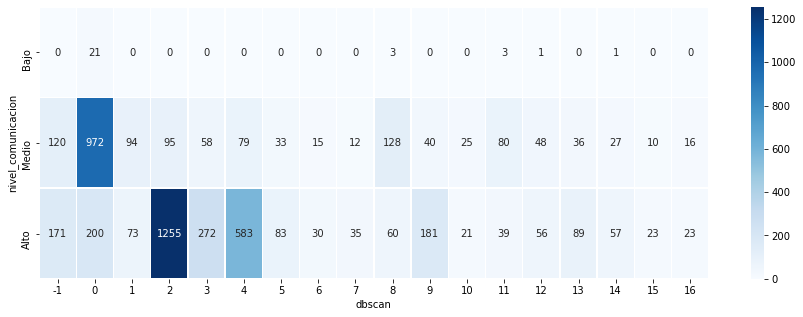

In [322]:
data_imputado['dbscan'] = clusters
for var in niveles:
    heatmap_count(data_imputado, "dbscan", var)

In [323]:
score_df['dbscan'] = clusters

<AxesSubplot:xlabel='score', ylabel='Count'>

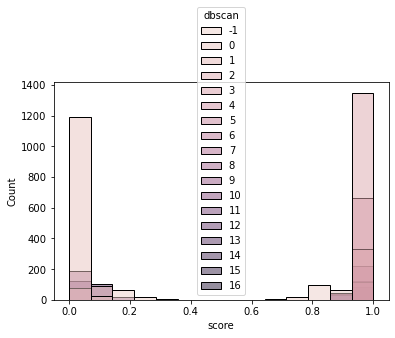

In [324]:
sns.histplot(score_df[score_df['dbscan'].apply(lambda x: x not in [-2])],x='score', hue='dbscan')

<AxesSubplot:xlabel='puntaje', ylabel='Count'>

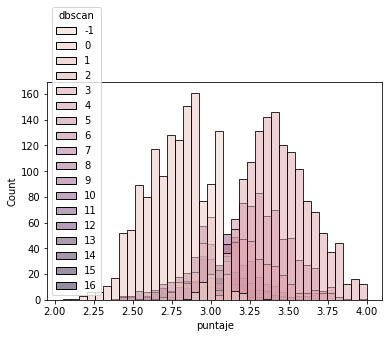

In [325]:
sns.histplot(score_df[score_df['dbscan'].apply(lambda x: x not in [-2])],x='puntaje', hue='dbscan')